In [16]:
import io, requests
import pandas as pd
import seaborn as sns
# データを取得


url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'


res = requests.get(url).content


# 取得したデータをDataFrameオブジェクトとして読み込み


mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)


# データの列にラベルを設定


mushroom.columns =['classes','cap_shape','cap_surface','cap_color','odor','bruises',


'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',


'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',


'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',


'ring_number','ring_type','spore_print_color','population','habitat']


# 先頭5行を表示


mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [18]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
label_encode=preprocessing.LabelEncoder()
mushroom_encode=mushroom.apply(lambda x:label_encode.fit_transform(x))

Y=mushroom_encode['classes']
X=mushroom_encode.drop('classes',axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=0)


In [19]:
knn =KNeighborsClassifier(n_neighbors=6)
knn.fit(X_test,Y_test)
Y_pred=knn.predict(X_test)
Y_pred

array([1, 0, 0, ..., 0, 0, 0])

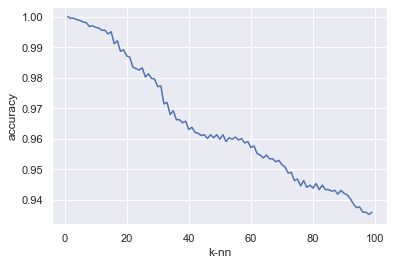

In [21]:
accuracy_list = []
sns.set()
k_range = range(1, 100)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_test, Y_test)
    Y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(Y_test, Y_pred))

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, accuracy_list)
ax.set_xlabel('k-nn')
ax.set_ylabel('accuracy')
plt.show()